In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

## Missing values

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Target variable analysis

In [4]:
target = df.groupby('Outcome').agg({'Outcome': 'count'}).rename(columns = {'Outcome': 'count'}).reset_index()
target.iloc[[0, 1], 0] = ['No', 'Yes']
target

,Outcome,count
0,No,500
1,Yes,268


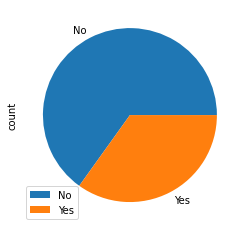

In [5]:
target.plot.pie(y = 'count', labels = np.array(target.iloc[:, 0]))
plt.show()

## Numerical Feature analysis

### Discrete value features

In [6]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 25]

print(len(discrete_features))
df[discrete_features].head()

2


,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1


#### Relation with target variable

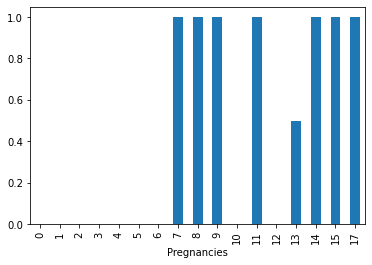

In [7]:
for feature in discrete_features:
    if feature != 'Outcome':
        data = df.copy()
        
        data.groupby(feature)['Outcome'].median().plot.bar()
        plt.show()

There seems to be some kind of discrepancy in the data as such a large number of pregnancies is obviously not possible

### Continuous value features

In [8]:
continuous_features = [feature for feature in df.columns if feature not in discrete_features]

print(len(continuous_features))
df[continuous_features].head()

7


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


#### Distribution

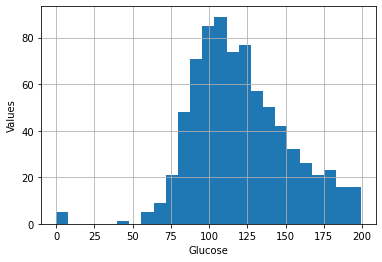

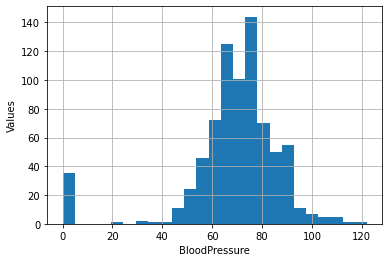

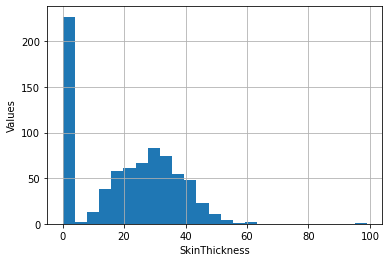

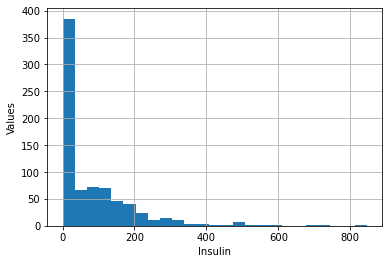

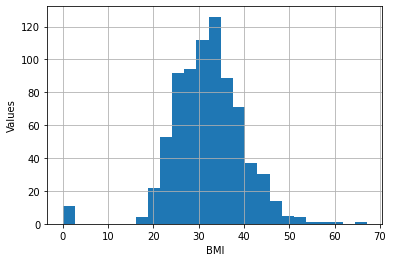

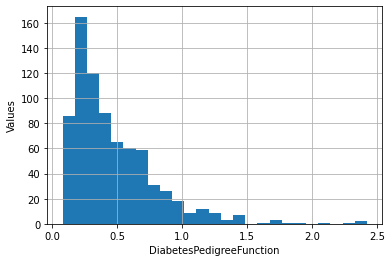

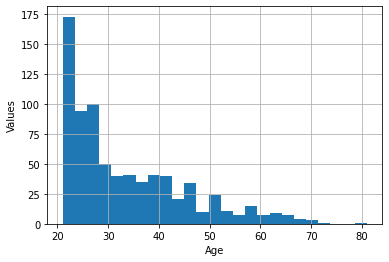

In [9]:
for feature in continuous_features:
    data = df.copy()
    
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

We can see that a lot of features that cannot be 0 have the value 0 in them. Therefore we will replace 0 with median value or random values

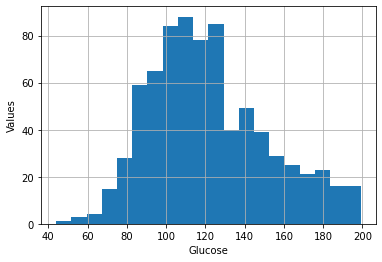

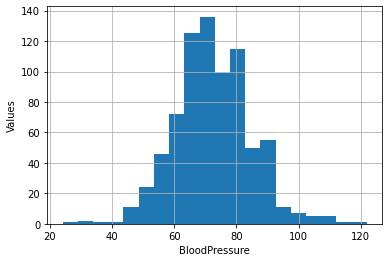

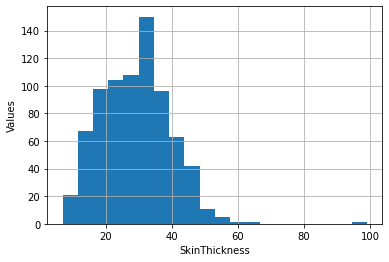

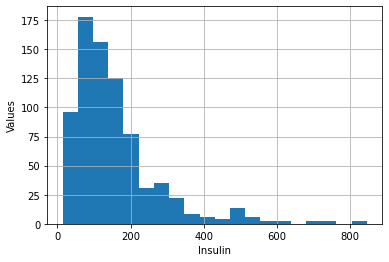

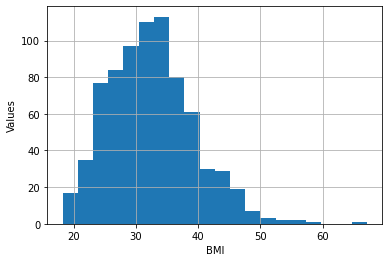

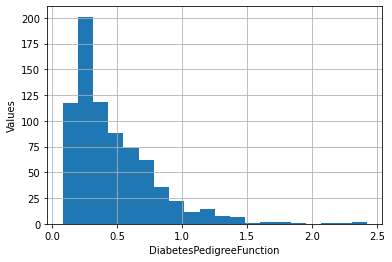

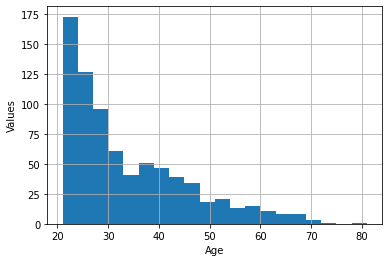

In [49]:
## Replace 0
data = df.copy()

for feature in ['Glucose', 'BloodPressure', 'BMI']:    
    data[feature] = np.where(data[feature] == 0, data[feature].median(), data[feature])

for feature in ['Insulin', 'SkinThickness']:
    data[feature] = np.where(data[feature] == 0, np.nan, data[feature])
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum(), random_state = 0)
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
for feature in continuous_features:
    data[feature].hist(bins = 20)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

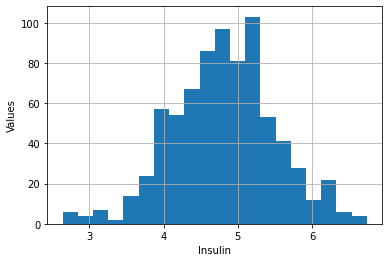

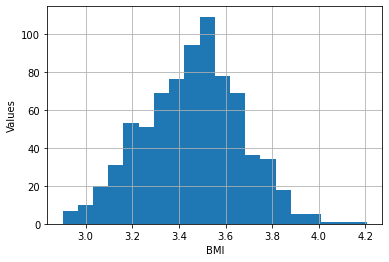

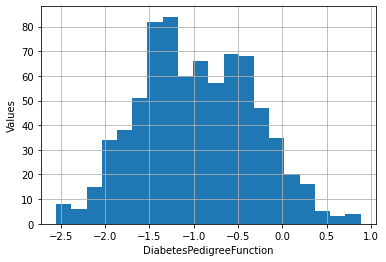

In [50]:
## Log transformation
for feature in continuous_features[3:-1]:
    data[feature] = np.log(data[feature])
    
    data[feature].hist(bins = 20)
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()

#### Relation with target variable

Pregnancies


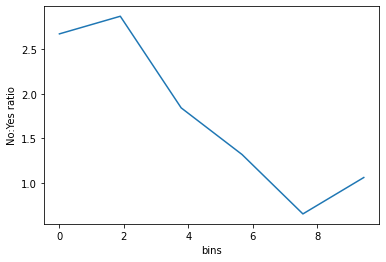

Glucose


<ipython-input-72-79beb958e107>:15: RuntimeWarning:

divide by zero encountered in longlong_scalars



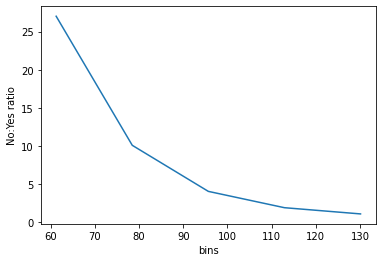

BloodPressure


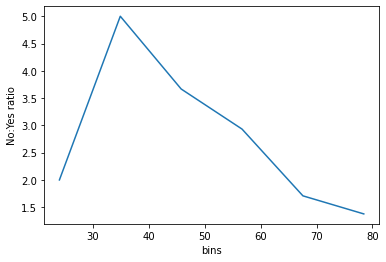

SkinThickness


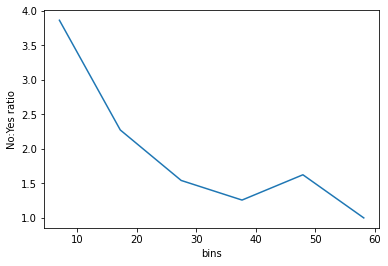

Insulin


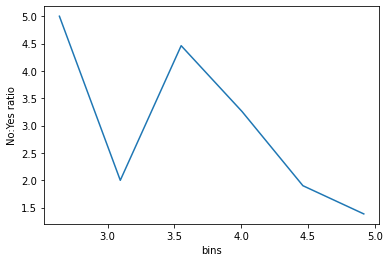

BMI


<ipython-input-72-79beb958e107>:15: RuntimeWarning:

divide by zero encountered in longlong_scalars



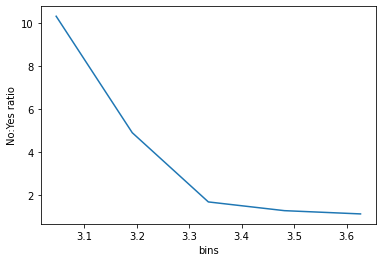

DiabetesPedigreeFunction


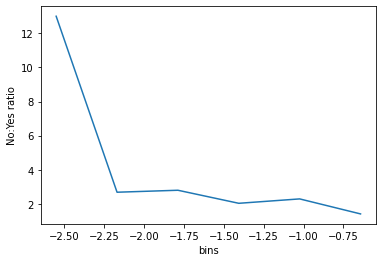

Age


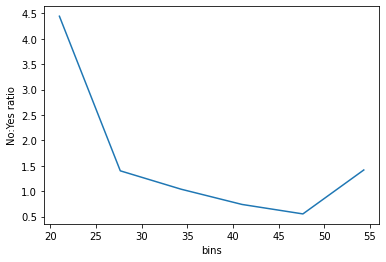

In [72]:
eda_data = data.copy()

for feature in eda_data.columns:
    if feature != 'Outcome':
        bins = np.linspace(eda_data[feature].min(), eda_data[feature].max(), 10)
        labels = bins[0:-1]
        eda_data[feature + 'bins'] = pd.cut(eda_data[feature], bins = bins, labels = labels, include_lowest = True)
        
        feature_df = eda_data.groupby([feature + 'bins', 'Outcome']).agg({'Outcome': 'count'}).rename(columns = {'Outcome': 'count'}).reset_index()
        print(feature)
        x = []
        y = []
        for i in np.linspace(0, 10, 6, dtype = int):
            x.append(feature_df.iloc[i, 0])
            y.append(feature_df.iloc[i, 2] / feature_df.iloc[i + 1, 2])
            
        plt.plot(x, y)
        plt.xlabel('bins')
        plt.ylabel('No:Yes ratio')
        plt.show()

Observations:
1. Risk of Diabetes increases with increase in Number of Pregnancies
2. Risk of Diabetes increases with increase in Glucose value
3. Risk of Diabetes increases with increase in Blood Pressure value
4. Risk of Diabetes increases with increase in Insulin value
5. Risk of Diabetes increases with increase in BMI value

# Feature Engineering

In [78]:
df = pd.read_csv('diabetes.csv')

## Replacing 0(missing) values

In [79]:
for feature in ['Glucose', 'BloodPressure', 'BMI']:    
    df[feature] = np.where(df[feature] == 0, df[feature].median(), df[feature])

for feature in ['Insulin', 'SkinThickness']:
    df[feature] = np.where(df[feature] == 0, np.nan, df[feature])
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state = 0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
print(df.shape)

(768, 9)


## Transforming features

In [80]:
##Log transformation
for feature in ['Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    df[feature] = np.log(df[feature])
    
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,5.913503,3.514526,-0.466809,50,1
1,1,85.0,66.0,29.0,4.330733,3.280911,-1.046969,31,0
2,8,183.0,64.0,31.0,4.143135,3.148453,-0.397497,32,1
3,1,89.0,66.0,23.0,4.543295,3.335770,-1.789761,21,0
4,0,137.0,40.0,35.0,5.123964,3.763523,0.827678,33,1


In [81]:
df.to_csv('cleaned_data.csv', index = False)

# Feature Selection

In [82]:
df = pd.read_csv('cleaned_data.csv')
print(df.shape)

(768, 9)


In [83]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

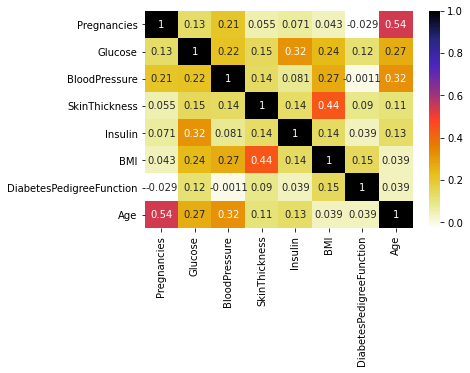

In [87]:
cor = X.corr()

sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

# Models

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [124]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred = regressor.predict(X_test)

In [127]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))

[[85 16]
 [26 27]]
              precision    recall  f1-score   support

           0     0.7658    0.8416    0.8019       101
           1     0.6279    0.5094    0.5625        53

    accuracy                         0.7273       154
   macro avg     0.6968    0.6755    0.6822       154
weighted avg     0.7183    0.7273    0.7195       154



In [128]:
regressor = LogisticRegression()

scores = cross_val_score(regressor, X_train, y_train, cv = 10)
print(np.mean(scores))

0.7834214701216288


## SVM

In [129]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [130]:
y_pred = classifier.predict(X_test)

In [131]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))

[[83 18]
 [27 26]]
              precision    recall  f1-score   support

           0     0.7545    0.8218    0.7867       101
           1     0.5909    0.4906    0.5361        53

    accuracy                         0.7078       154
   macro avg     0.6727    0.6562    0.6614       154
weighted avg     0.6982    0.7078    0.7005       154



In [132]:
classifier = SVC()
 
scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print(np.mean(scores))

0.7639873083024854


## KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
y_pred = classifier.predict(X_test)

In [135]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))

[[84 17]
 [28 25]]
              precision    recall  f1-score   support

           0     0.7500    0.8317    0.7887       101
           1     0.5952    0.4717    0.5263        53

    accuracy                         0.7078       154
   macro avg     0.6726    0.6517    0.6575       154
weighted avg     0.6967    0.7078    0.6984       154



In [136]:
classifier = KNeighborsClassifier()

scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print(np.mean(scores))

0.7428609201480698


## Random Forest

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [138]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
y_pred = classifier.predict(X_test)

In [140]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))

[[84 17]
 [28 25]]
              precision    recall  f1-score   support

           0     0.7500    0.8317    0.7887       101
           1     0.5952    0.4717    0.5263        53

    accuracy                         0.7078       154
   macro avg     0.6726    0.6517    0.6575       154
weighted avg     0.6967    0.7078    0.6984       154



In [163]:
classifier = RandomForestClassifier()

scores = cross_val_score(classifier, X, y, cv = 10)
print(np.mean(scores))

0.7642857142857143


## XGBoost

In [142]:
from xgboost import XGBClassifier

classifier = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [143]:
y_pred = classifier.predict(X_test)

In [144]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))

[[81 20]
 [27 26]]
              precision    recall  f1-score   support

           0     0.7500    0.8020    0.7751       101
           1     0.5652    0.4906    0.5253        53

    accuracy                         0.6948       154
   macro avg     0.6576    0.6463    0.6502       154
weighted avg     0.6864    0.6948    0.6891       154



In [145]:
classifier = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False)

scores = cross_val_score(classifier, X, y, cv = 10)
print(np.mean(scores))

0.7434723171565276


## Random Forest hyperparameter tuning

In [148]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [149]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_random.fit(X, y)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': True}

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.linspace(1100, 1300, 5, dtype = int),
              'min_samples_split': [8, 10, 12], 
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['log2'],
              'max_depth': [25, 30, 35],
              'criterion': ['gini'],
              'bootstrap': [True]}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

rf_grid.fit(X, y)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.8min finished


{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': True}

In [160]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 35,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1250}

In [162]:
classifier = RandomForestClassifier(n_estimators = 1250, 
                                    criterion = 'gini', 
                                    bootstrap = 'True', 
                                    max_depth = 35, 
                                    max_features = 'log2',
                                    min_samples_leaf = 3,
                                    min_samples_split = 8)

scores = cross_val_score(classifier, X, y, cv = 10)
print(np.mean(scores))

0.7590738209159262
